In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import networkx as nx


In [3]:
data = pd.read_csv('dataset/elliptic_dataset.zip')
data.head()

,Unnamed: 0,txId,timestep,col0,col1,col2,col3,col4,col5,col6,...,col156,col157,col158,col159,col160,col161,col162,col163,col164,result
0,3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,1
1,9,232029206,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,1
2,10,232344069,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
3,11,27553029,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
4,16,3881097,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,1


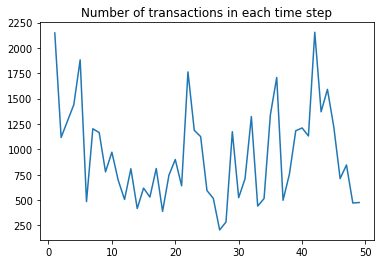

In [4]:
data['timestep'].value_counts().sort_index().plot();
plt.title('Number of transactions in each time step');

In [5]:
data.groupby(['result']).count()

,Unnamed: 0,txId,timestep,col0,col1,col2,col3,col4,col5,col6,...,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164
result,,,,,,,,,,,,,,,,,,,,,
0,4545,4545,4545,4545,4545,4545,4545,4545,4545,4545,...,4545,4545,4545,4545,4545,4545,4545,4545,4545,4545
1,42019,42019,42019,42019,42019,42019,42019,42019,42019,42019,...,42019,42019,42019,42019,42019,42019,42019,42019,42019,42019


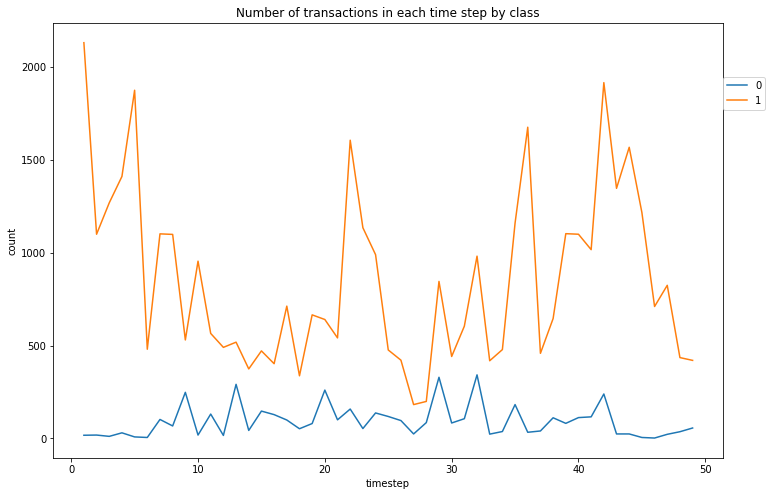

In [6]:
plt.figure(figsize=(12, 8))
grouped = data.groupby(['timestep', 'result'])['Unnamed: 0'].count().reset_index().rename(columns={'Unnamed: 0': 'count'})
sns.lineplot(x='timestep', y='count', hue='result', data=grouped);
plt.legend(loc=(1.0, 0.8));
plt.title('Number of transactions in each time step by class');

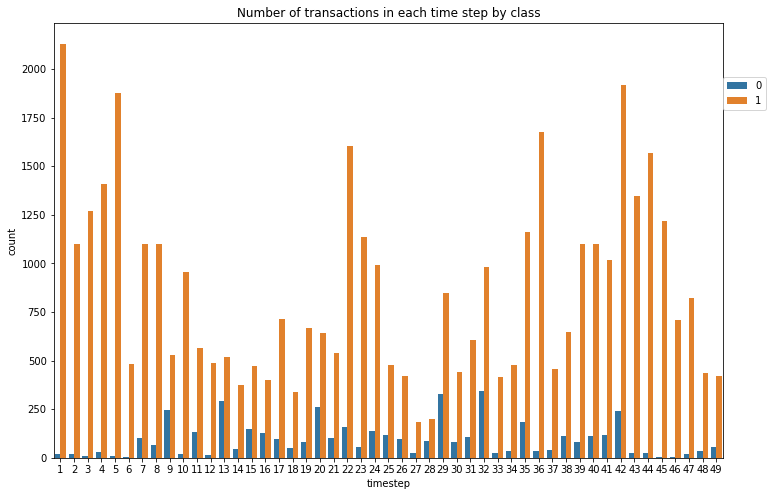

In [7]:

plt.figure(figsize=(12, 8))
grouped = data.groupby(['timestep', 'result'])['Unnamed: 0'].count().reset_index().rename(columns={'Unnamed: 0': 'count'})
sns.barplot(x='timestep', y='count', hue='result', data=grouped)
plt.legend(loc=(1.0, 0.8))
plt.title('Number of transactions in each time step by class');

In [8]:
df_features=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_features.csv")
df_classes=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_classes.csv")
df_edgelist=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_edgelist.csv")


In [9]:
df_features.columns = ['id', 'time step'] + [f'trans_feat_{i}' for i in range(93)] + [f'agg_feat_{i}' for i in range(72)]
df_features = pd.merge(df_features, df_classes, left_on='id', right_on='txId', how='left')

In [24]:
bad_ids = df_features.loc[(df_features['time step'] == 49) & (df_features['class'] == '1'), 'id']
short_edges = df_edgelist.loc[df_edgelist['txId1'].isin(bad_ids)]

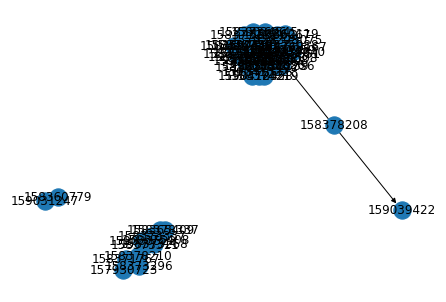

In [25]:
graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

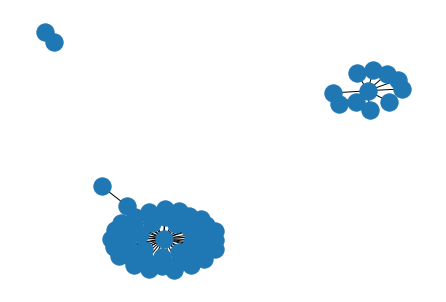

In [26]:
graph1 = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.Graph())
pos1 = nx.spring_layout(graph1)
nx.draw(graph1, cmap = plt.get_cmap('rainbow'), with_labels=False, pos=pos1)